<a href="https://colab.research.google.com/github/tobinw23/2023-baseball-project/blob/main/2023_Anthony_Volpe_1st_Half_vs_2nd_Half.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install pybaseball

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.1/426.1 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 350.2/350.2 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 856.7/856.7 kB 10.1 MB/s eta 0:00:00
  Attempting uninstall: pyjwt
    Found existing installation: PyJWT 2.3.0
    Uninstalling PyJWT-2.3.0:
      Successfully uninstalled PyJWT-2.3.0


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
from pandas.api.types import CategoricalDtype
from plotnine import *
from plotnine.data import mpg

In [13]:
from pybaseball import  playerid_lookup
from pybaseball import statcast_batter
import pybaseball as pyb
import matplotlib.patches as patches
import seaborn as sns

In [14]:
playerid_lookup('volpe', 'anthony')

,name_last,name_first,key_mlbam,key_retro,key_bbref,key_fangraphs,mlb_played_first,mlb_played_last
0,volpe,anthony,683011,volpa001,volpean01,27647,2023.0,2023.0


In [16]:
Volpe1 = pyb.statcast_batter('2023-03-30','2023-07-11',683011)
Volpe2 =pyb.statcast_batter('2023-07-12','2023-10-03',683011)
Volpe1.head()

Gathering Player Data
Gathering Player Data


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
0,SI,2023-07-09,87.3,-2.57,6.09,"Volpe, Anthony",683011,543294,home_run,hit_into_play,...,1,1,3,3,1,Standard,Standard,210.0,0.295,1.840
1,CH,2023-07-09,79.3,-2.55,6.15,"Volpe, Anthony",683011,543294,NaN,ball,...,1,1,1,1,1,Standard,Standard,231.0,0.000,0.025
2,SI,2023-07-09,88.1,-2.71,6.09,"Volpe, Anthony",683011,543294,field_out,hit_into_play,...,0,0,1,1,0,Standard,Standard,209.0,-0.015,-0.119
3,SI,2023-07-09,87.8,-2.69,6.09,"Volpe, Anthony",683011,543294,NaN,foul,...,0,0,1,1,0,Standard,Standard,213.0,0.000,-0.043
4,CH,2023-07-09,79.4,-2.68,6.18,"Volpe, Anthony",683011,543294,NaN,ball,...,0,0,1,1,0,Standard,Standard,226.0,0.000,0.019


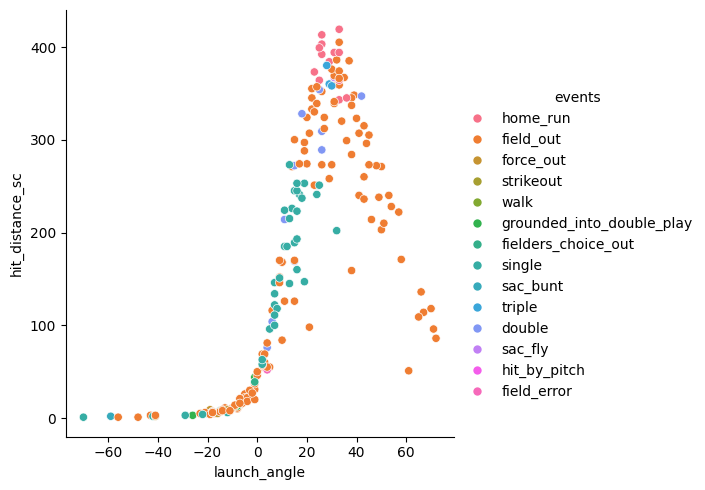

In [20]:
sns.relplot(
    data=Volpe1,
    x="launch_angle",
    y="hit_distance_sc",
    hue="events",
    aspect=1,
)

In [41]:
Volpe1[["launch_angle","launch_speed","hit_distance_sc"]]

,launch_angle,launch_speed,hit_distance_sc
0,29.0,99.4,384.0
1,NaN,NaN,NaN
2,-17.0,86.5,5.0
3,49.0,53.3,145.0
4,NaN,NaN,NaN
...,...,...,...
1281,NaN,NaN,NaN
1282,NaN,NaN,NaN
1283,NaN,NaN,NaN
1284,NaN,NaN,NaN


In [42]:
Volpe1[["launch_angle","launch_speed","hit_distance_sc"]].corr()


,launch_angle,launch_speed,hit_distance_sc
launch_angle,1.000000,0.188851,0.646928
launch_speed,0.188851,1.000000,0.469481
hit_distance_sc,0.646928,0.469481,1.000000


In [43]:
Volpe2[["launch_angle","launch_speed","hit_distance_sc"]].corr()

,launch_angle,launch_speed,hit_distance_sc
launch_angle,1.000000,0.120037,0.644736
launch_speed,0.120037,1.000000,0.409522
hit_distance_sc,0.644736,0.409522,1.000000


Text(0.5, 1.0, "Anthony Volpe's 2nd Half Linear Model")

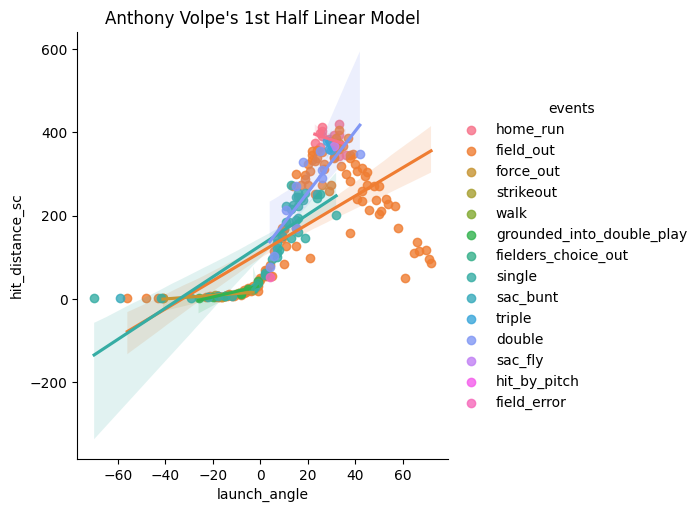

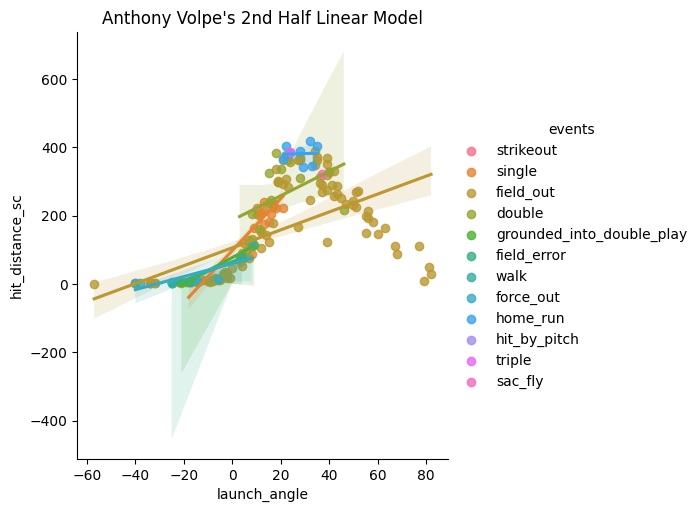

In [67]:
sns.lmplot(x="launch_angle",y="hit_distance_sc", hue="events", data=Volpe1)
ax = plt.gca()
ax.set_title("Anthony Volpe's 1st Half Linear Model")
sns.lmplot(x="launch_angle",y="hit_distance_sc", hue="events", data=Volpe2)
ax1 = plt.gca()
ax1.set_title("Anthony Volpe's 2nd Half Linear Model")